
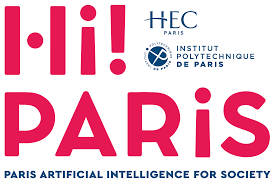

___


* <b>Author: Gaëtan Brison - ML Research Engineer - Institut Polytechnique de Paris</b>
* <b>Publication Date: 09/17/2022</b>
* <b>Goal: The goal of this script is to encode text using </b>

___

## I) - Import Library

In [1]:
import pandas as pd
import numpy as np

from transformers import AutoModel, BertTokenizerFast

_DESCRIPTION = """\
PUBHEALTH is a comprehensive dataset for explainable automated fact-checking of
public health claims. Each instance in the PUBHEALTH dataset has an associated
veracity label (true, false, unproven, mixture). Furthermore each instance in the
dataset has an explanation text field. The explanation is a justification for which
the claim has been assigned a particular veracity label.

The dataset was created to explore fact-checking of difficult to verify claims i.e.,
those which require expertise from outside of the journalistics domain, in this case
biomedical and public health expertise.

It was also created in response to the lack of fact-checking datasets which provide
gold standard natural language explanations for verdicts/labels.

NOTE: There are missing labels in the dataset and we have replaced them with -1.
"""


https://huggingface.co/datasets/health_fact

In [3]:
pub_health_train = pd.read_csv("train.tsv", sep='\t')

In [4]:
pub_health_train = pub_health_train[pub_health_train['label'] != 'snopes']
pub_health_train = pub_health_train[['main_text','label']]
pub_health_train = pub_health_train.dropna(subset=['main_text', 'label'])

pub_health_train.head()

,main_text,label
0,"""Hillary Clinton is in the political crosshair...",false
1,While the financial costs of screening mammogr...,mixture
2,The news release quotes lead researcher Robert...,mixture
3,"The story does discuss costs, but the framing ...",true


In [18]:
def tokenizer_bert(max_length):
    """ implement a tokenize function using the bert-base-uncased approach of HuggingFace
    
    Parameters:
    ----
    max_length: int
    number of tokens the string will be converted to 
    
    Return:
    ----
    
    tokens_train: transformers.tokenization_utils_base.BatchEncoding
    dictionary with input_ids , attention_masks with padding
    
    """
    
    tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

    tokens_train = tokenizer.batch_encode_plus(
          pub_health_train["main_text"].tolist(),
          max_length = max_length,
          pad_to_max_length=True,
          truncation=True,
          return_token_type_ids=False
      )
    return tokens_train

In [13]:
pub_health_train["main_text"]

0    "Hillary Clinton is in the political crosshair...
1    While the financial costs of screening mammogr...
2    The news release quotes lead researcher Robert...
3    The story does discuss costs, but the framing ...
Name: main_text, dtype: object

In [19]:
tokenizer_bert(512)

{'input_ids': [[101, 1000, 18520, 7207, 2003, 1999, 1996, 2576, 2892, 26227, 2015, 2004, 1996, 3166, 1997, 1037, 2047, 2338, 2035, 24746, 2015, 24156, 3361, 7208, 2090, 2014, 2270, 1998, 3167, 2166, 1012, 2012, 3277, 1999, 4603, 3166, 2848, 8040, 2232, 19845, 6290, 1521, 1055, 16875, 2338, 7207, 5356, 2024, 11440, 2013, 3097, 6867, 2000, 1996, 7207, 3192, 2076, 1996, 2176, 2086, 2016, 2366, 2004, 3187, 1997, 2110, 1012, 2577, 15963, 7361, 28262, 2109, 2019, 4357, 2007, 8040, 2232, 19845, 6290, 2006, 5925, 2023, 2733, 2000, 2391, 2041, 2054, 2060, 2512, 26053, 8845, 2031, 2179, 1024, 2045, 2003, 2053, 1000, 1000, 9422, 3282, 1000, 1000, 4760, 2008, 11440, 2000, 1996, 3192, 5105, 2014, 3097, 3343, 6567, 1012, 2145, 1010, 2280, 3951, 2160, 5882, 25597, 18353, 16523, 7033, 2758, 1996, 11440, 2024, 1000, 1000, 4415, 6206, 1000, 1000, 2104, 2976, 2375, 1012, 1999, 2010, 3193, 1010, 1037, 13445, 2011, 1037, 3097, 2231, 2000, 1996, 7207, 3192, 2096, 7207, 2001, 3187, 1997, 2110, 2003, 1996, 21

### Congrats you made it 🎉